# Homework # 3

## Question 1, part 4, 5

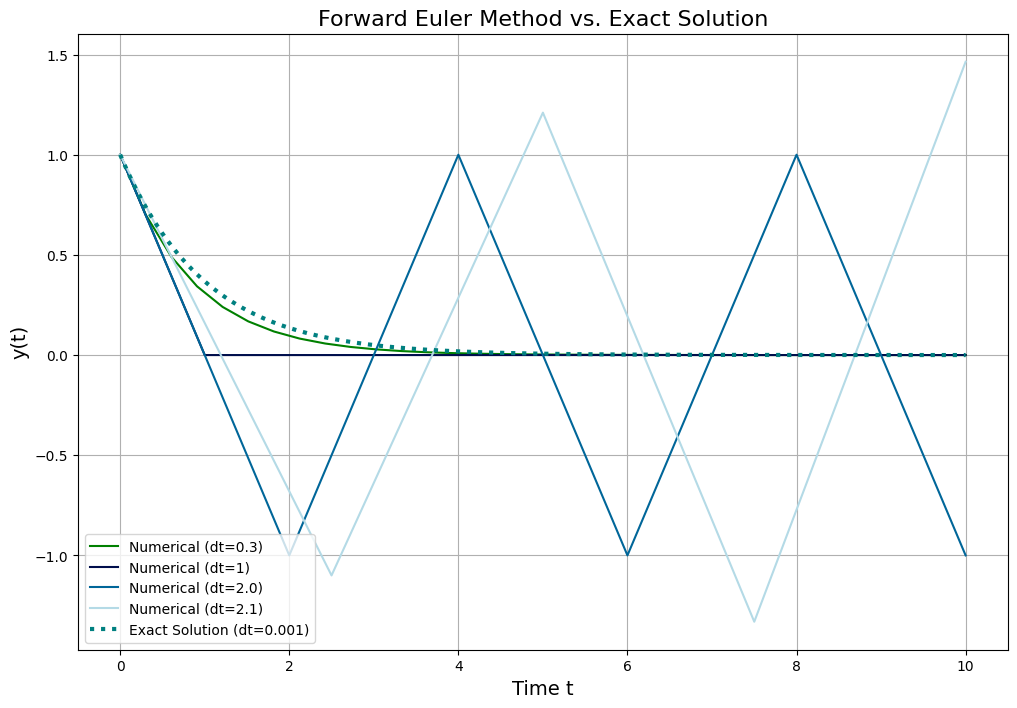

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Parameters
alpha = 1.0  # rate of decay
T = 10.0     # total time
dt_list = [0.3, 1, 2.0, 2.1]  # stable, borderline, unstable

# Function to compute the exact solution
def exact_solution(t):
    return np.exp(-alpha * t)

# Forward Euler method implementation
def forward_euler(dt):
    N = int(T / dt)  # number of time steps
    t_values = np.linspace(0, T, N + 1)
    y_values = np.zeros(N + 1)
    y_values[0] = 1  # initial condition
    
    for n in range(N):
        y_values[n + 1] = y_values[n] * (1 - alpha * dt)

    return t_values, y_values

def backward_euler(dt):
    N = int(T / dt)  # number of time steps
    t_values = np.linspace(0, T, N + 1)
    y_values = np.zeros(N + 1)
    y_values[0] = 1  # initial condition
    
    for n in range(N):
        y_values[n + 1] = y_values[n] * 1/(1 + alpha * dt)

    return t_values, y_values

def trapezoidal_method(dt):
    N = int(T / dt)  # number of time steps
    t_values = np.linspace(0, T, N + 1)
    y_values = np.zeros(N + 1)
    y_values[0] = 1  # initial condition
    
    for n in range(N):
        y_values[n + 1] = y_values[n] * (1 - 0.5 * alpha * dt) / (1 + 0.5 * alpha * dt)

    return t_values, y_values

# Colormap for plotting
colors = cm.ocean(np.linspace(0, .9, len(dt_list)))  # Using inferno colormap

def plot_sol(eval_type):
    # Plotting results
    plt.figure(figsize=(12, 8))
    for i, dt in enumerate(dt_list):
        if eval_type == "Forward Euler Method":
            t_values, y_numerical = forward_euler(dt)
        elif eval_type == "Backward Euler Method":
            t_values, y_numerical = backward_euler(dt)
        else:
            t_values, y_numerical = trapezoidal_method(dt)
        
        plt.plot(t_values, y_numerical, color=colors[i], label=f'Numerical (dt={dt})')
        
    dt = .001
    t_exact = np.linspace(0, T, int(T/dt))
    y_exact = exact_solution(t_exact)
    plt.plot(t_exact, y_exact, ":", color="teal",  linewidth = 3, label=f'Exact Solution (dt={.001})')

    plt.title(f"{eval_type} vs. Exact Solution", fontsize=16)
    plt.xlabel('Time t', fontsize=14)
    plt.ylabel('y(t)', fontsize=14)
    plt.legend(loc=3)
    plt.grid()
    plt.show()
plot_sol("Forward Euler Method")


## Question 2, part 2, 3

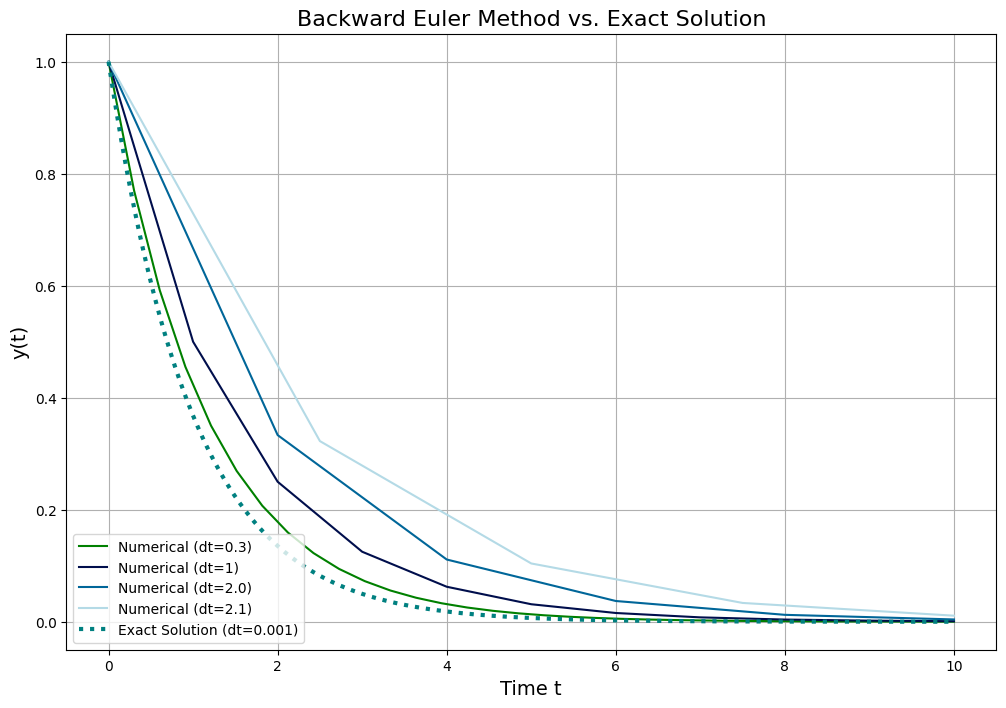

In [131]:
plot_sol("Backward Euler Method")

## Question 3, part 2, 3

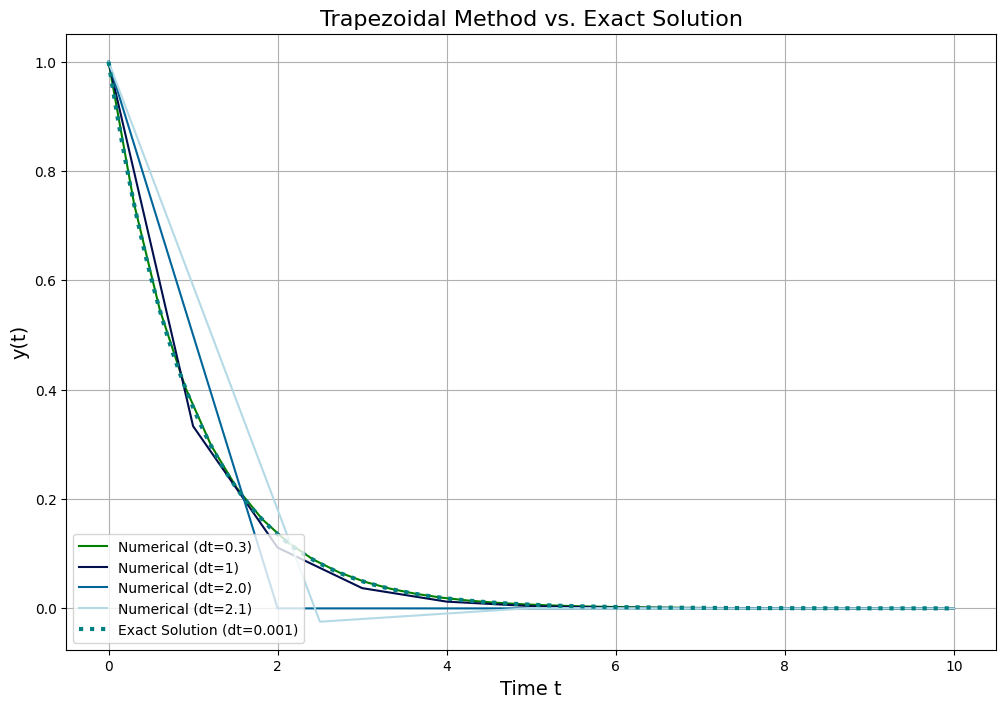

In [132]:
plot_sol("Trapezoidal Method")

## Question 3, part 3: Convergence

Step 2:
Current dt: 0.021181818181818184
Current error: 6.651738146595809e-05
Previous error scaled: 0.000938061508489624
Step 3:
Current dt: 0.03127272727272727
Current error: 0.000853985156140824
Previous error scaled: 0.0001449907136465143
Step 4:
Current dt: 0.041363636363636366
Current error: 0.0011031371553180125
Previous error scaled: 0.001494019376606055
Step 5:
Current dt: 0.05145454545454546
Current error: 0.0005747567313139079
Previous error scaled: 0.0017070238209349463
Step 6:
Current dt: 0.06154545454545455
Current error: 0.0009756174418181218
Previous error scaled: 0.0008222966883915771
Step 7:
Current dt: 0.07163636363636364
Current error: 0.0014110682339966152
Previous error scaled: 0.0013217662351549034
Step 8:
Current dt: 0.08172727272727273
Current error: 0.0008734116986821583
Previous error scaled: 0.001836601622343236
Step 9:
Current dt: 0.09181818181818183
Current error: 0.0028307531452589907
Previous error scaled: 0.0011024080319446147
Step 10:
Current dt: 0.101

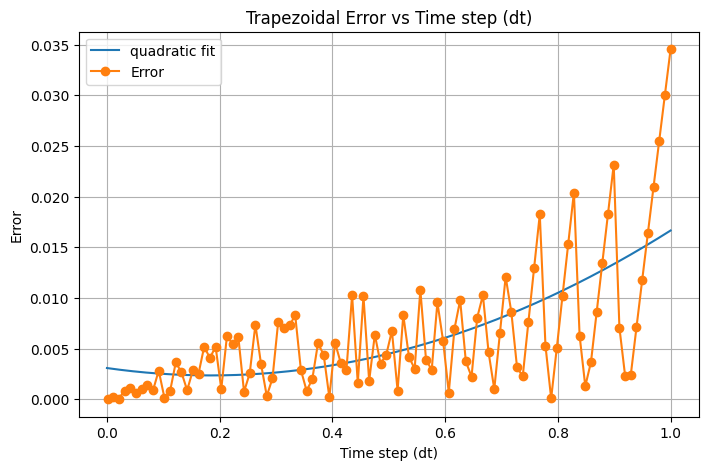

In [133]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

dt_list = np.logspace(-3,.2, 100)
dt_list = np.linspace(1e-3,1, 100)
def plot_convergence(dt_list, method):
    errors = []
    # Calculate errors for different time steps
    for i, dt in enumerate(dt_list):
        t, y_numerical = eval(method)(dt)
        y_exact = exact_solution(t)
        error = np.max(np.abs(y_numerical - y_exact))
        if i > 1:
            print(f"Step {i}:")
            print(f"Current dt: {dt}")
            print(f"Current error: {error}")
            print(f"Previous error scaled: {(dt/dt_list[i-1])**2 * errors[i-1]}")
            # assert error <=  errors[i-1] * (dt/dt_list[i-1])**2+10**-8, f"Convergence rate not met for dt = {dt}"
        errors.append(error)

    # Print errors

    if method == "trapezoidal_method":
        s = "Trapezoidal"
    elif method == "backward_euler":
        s = "Backward Euler"
    else:
        s = "Forward Euler"
    
    for dt, error in zip(dt_list, errors):
        if s == "Trapezoidal":
            print(f'dt = {dt}, Error = {error}, ratio = {error/dt**2}')
        else: # order 1
            print(f'dt = {dt}, Error = {error}, ratio = {error/dt}')

    x = np.linspace(0,max(dt_list), 1000)
  

    # Plotting the error

    plt.figure(figsize=(8, 5))
    if s == "Trapezoidal":
        poly = PolynomialFeatures(degree=2)
        poly_dt_list = poly.fit_transform(dt_list.reshape(len(dt_list),1))

        model = LinearRegression()
        model.fit(poly_dt_list, errors)
        plt.title(f'{s} Error vs Time step (dt)')
        plt.plot(x,model.predict(poly.fit_transform(x.reshape(len(x),1))), label = "quadratic fit")
    else:
        poly = PolynomialFeatures(degree=1)
        poly_dt_list = poly.fit_transform(dt_list.reshape(len(dt_list),1))

        model = LinearRegression()
        model.fit(poly_dt_list, errors)
        slope = model.coef_[1]
        plt.plot(x,model.predict(poly.fit_transform(x.reshape(len(x),1))), label = "linear fit")
        plt.title(f'{s} Error vs Time step (dt), slope = {slope:.4f}')
    plt.plot(dt_list, errors, 'o-', label='Error')
    plt.xlabel('Time step (dt)')
    plt.ylabel('Error')
    
    plt.grid(True)
    plt.legend()
    plt.show()

plot_convergence(dt_list,"trapezoidal_method")



Step 2:
Current dt: 0.375
Current error: 0.004887808317751652
Previous error scaled: 0.0022059786714301866
Step 3:
Current dt: 0.1875
Current error: 0.0012224082265028802
Previous error scaled: 0.001221952079437913
Step 4:
Current dt: 0.09375
Current error: 0.0020355495427380466
Previous error scaled: 0.00030560205662572004
Step 5:
Current dt: 0.046875
Current error: 0.0005078284423021828
Previous error scaled: 0.0005088873856845116
Step 6:
Current dt: 0.0234375
Current error: 0.0005583992799300108
Previous error scaled: 0.0001269571105755457
Step 7:
Current dt: 0.01171875
Current error: 0.00013951991096877725
Previous error scaled: 0.0001395998199825027
Step 8:
Current dt: 0.005859375
Current error: 0.0001426781352705242
Previous error scaled: 3.487997774219431e-05
Step 9:
Current dt: 0.0029296875
Current error: 3.5664337490248776e-05
Previous error scaled: 3.566953381763105e-05
dt = 1.5, Error = 0.04601845998041898, ratio = 0.020452648880186212
dt = 0.75, Error = 0.008823914685720746

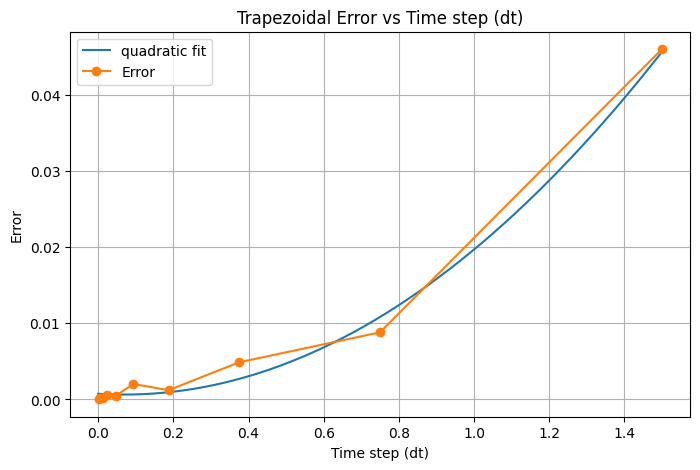

In [134]:
dt2_list = np.array([1.5*.5**n for n in range(10)])
plot_convergence(dt2_list, "trapezoidal_method")


# Additional Convergence Tests
## Forward Euler: O(h)

Step 2:
Current dt: 0.021181818181818184
Current error: 0.003850715183842557
Previous error scaled: 0.0065238485336765765
Step 3:
Current dt: 0.03127272727272727
Current error: 0.0049444385931597945
Previous error scaled: 0.00839356466310289
Step 4:
Current dt: 0.041363636363636366
Current error: 0.006587115768543594
Previous error scaled: 0.008650135206098792
Step 5:
Current dt: 0.05145454545454546
Current error: 0.009017313405154881
Previous error scaled: 0.01019307841636301
Step 6:
Current dt: 0.06154545454545455
Current error: 0.010529903999263512
Previous error scaled: 0.012900948431342726
Step 7:
Current dt: 0.07163636363636364
Current error: 0.012015485896468892
Previous error scaled: 0.014265910969889928
Step 8:
Current dt: 0.08172727272727273
Current error: 0.014491959067959803
Previous error scaled: 0.015638975039636512
Step 9:
Current dt: 0.09181818181818183
Current error: 0.01447186477378315
Previous error scaled: 0.018291548074335216
Step 10:
Current dt: 0.1019090909090909

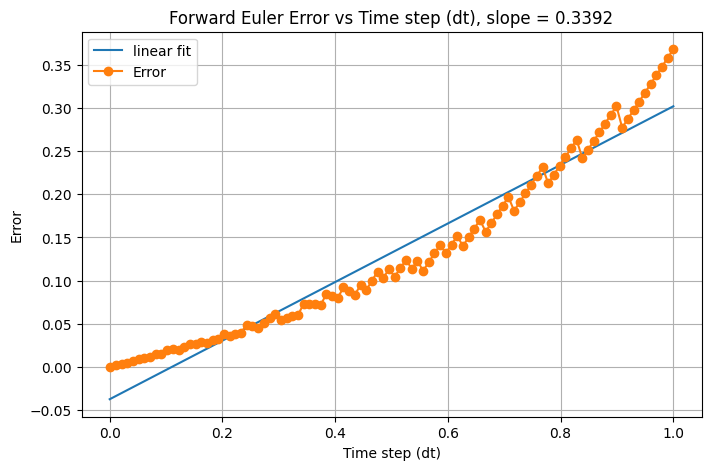

In [135]:
plot_convergence(dt_list,"forward_euler")

Step 2:
Current dt: 0.375
Current error: 0.07274436923117528
Previous error scaled: 0.05334234230779382
Step 3:
Current dt: 0.1875
Current error: 0.03521082709582224
Previous error scaled: 0.01818609230779382
Step 4:
Current dt: 0.09375
Current error: 0.015640339428263594
Previous error scaled: 0.00880270677395556
Step 5:
Current dt: 0.046875
Current error: 0.008220004132219294
Previous error scaled: 0.003910084857065899
Step 6:
Current dt: 0.0234375
Current error: 0.003778357689894929
Previous error scaled: 0.0020550010330548235
Step 7:
Current dt: 0.01171875
Current error: 0.00202240919852803
Previous error scaled: 0.0009445894224737322
Step 8:
Current dt: 0.005859375
Current error: 0.0009366787647857033
Previous error scaled: 0.0005056022996320075
Step 9:
Current dt: 0.0029296875
Current error: 0.0005036173486879791
Previous error scaled: 0.00023416969119642583
dt = 1.5, Error = 0.6888756028375618, ratio = 0.45925040189170785
dt = 0.75, Error = 0.21336936923117528, ratio = 0.2844924

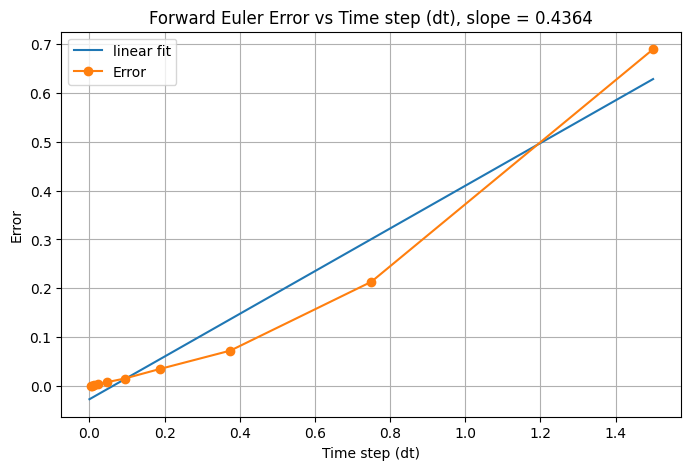

In [136]:
plot_convergence(dt2_list, "forward_euler")

## Backward Euler: O(h)

Step 2:
Current dt: 0.021181818181818184
Current error: 0.003942295085627767
Previous error scaled: 0.008358630512695862
Step 3:
Current dt: 0.03127272727272727
Current error: 0.006562494558136456
Previous error scaled: 0.008593185198711478
Step 4:
Current dt: 0.041363636363636366
Current error: 0.008634785770743114
Previous error scaled: 0.011480871720340386
Step 5:
Current dt: 0.05145454545454546
Current error: 0.009922004874751422
Previous error scaled: 0.01336169752625133
Step 6:
Current dt: 0.06154545454545455
Current error: 0.012126953007853714
Previous error scaled: 0.014195278291150918
Step 7:
Current dt: 0.07163636363636364
Current error: 0.014366074152935004
Previous error scaled: 0.01642959251653008
Step 8:
Current dt: 0.08172727272727273
Current error: 0.015611068832319941
Previous error scaled: 0.018698426100383
Step 9:
Current dt: 0.09181818181818183
Current error: 0.01936325988291604
Previous error scaled: 0.01970407276884039
Step 10:
Current dt: 0.10190909090909092
Curr

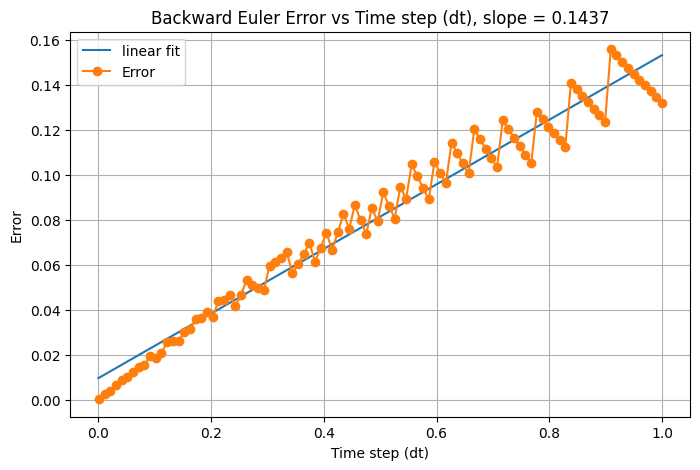

In [137]:
plot_convergence(dt_list,"backward_euler")

Step 2:
Current dt: 0.375
Current error: 0.06925190342266024
Previous error scaled: 0.02795485997580017
Step 3:
Current dt: 0.1875
Current error: 0.03425041377423771
Previous error scaled: 0.01731297585566506
Step 4:
Current dt: 0.09375
Current error: 0.01890945468811306
Previous error scaled: 0.008562603443559427
Step 5:
Current dt: 0.046875
Current error: 0.009031559969568781
Previous error scaled: 0.004727363672028265
Step 6:
Current dt: 0.0234375
Current error: 0.004844776846632315
Previous error scaled: 0.0022578899923921952
Step 7:
Current dt: 0.01171875
Current error: 0.0022887897878763885
Previous error scaled: 0.0012111942116580787
Step 8:
Current dt: 0.005859375
Current error: 0.0012188798712795545
Previous error scaled: 0.0005721974469690971
Step 9:
Current dt: 0.0029296875
Current error: 0.0005741561949016427
Previous error scaled: 0.00030471996781988864
dt = 1.5, Error = 0.2111243971624382, ratio = 0.14074959810829213
dt = 0.75, Error = 0.11181943990320067, ratio = 0.14909

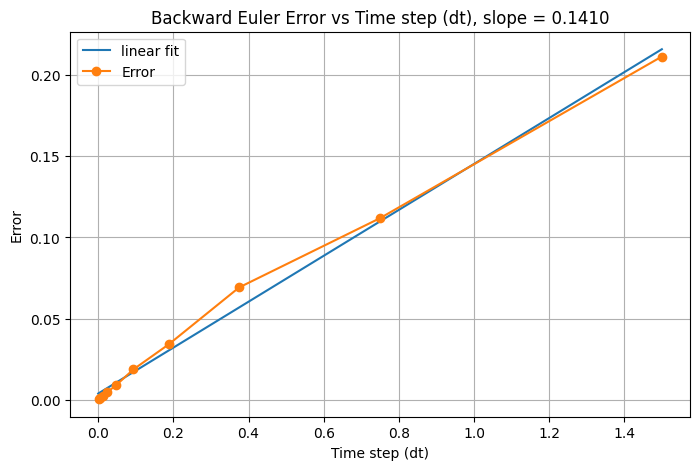

In [138]:
plot_convergence(dt2_list, "backward_euler")